### <center> Body Performance Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  = pd.read_csv("./bodyPerformance.csv")
data.head(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B


In [3]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [5]:
data.shape

(13393, 12)

In [6]:
data.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

In [7]:
data.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [8]:
data.duplicated().sum()

1

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
Data = data[['height_cm','weight_kg','body fat_%','diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts','broad jump_cm']]

### EDA

#### Univariate Analysis

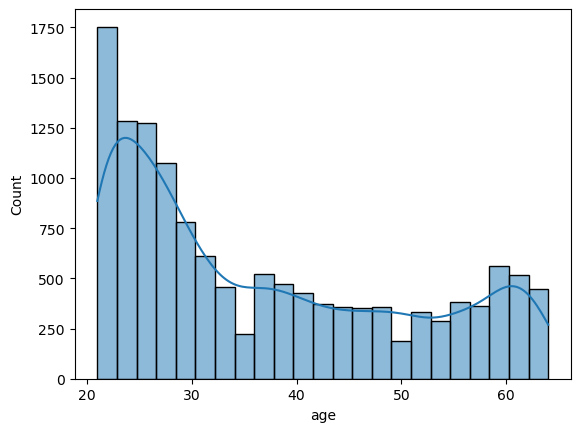

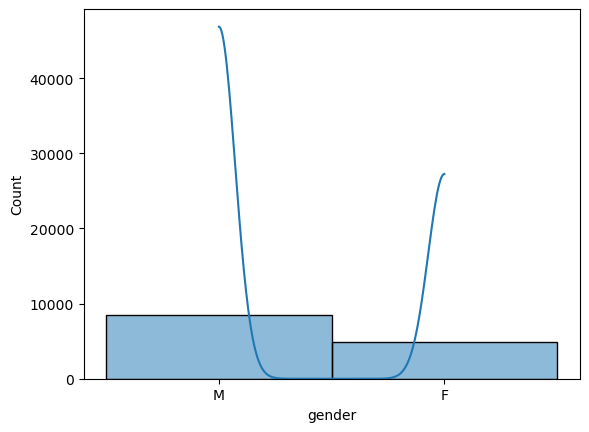

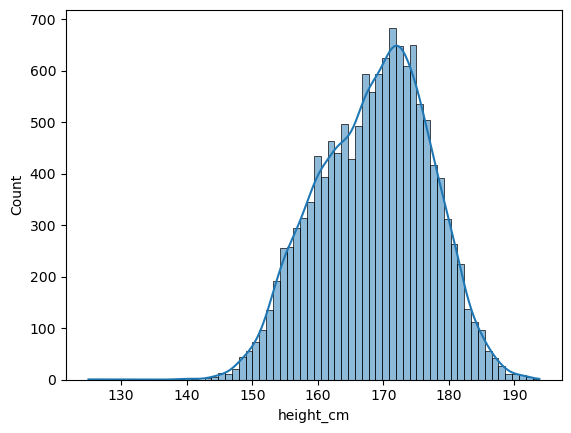

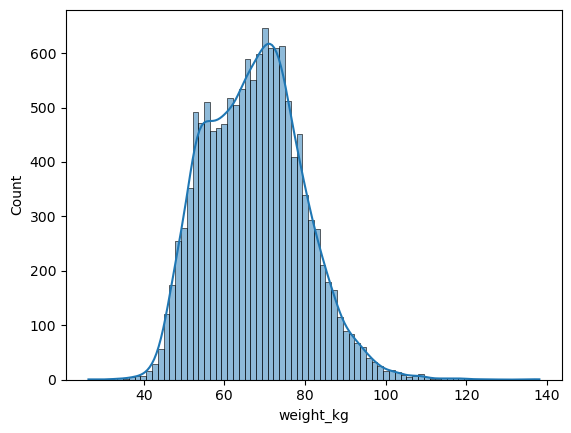

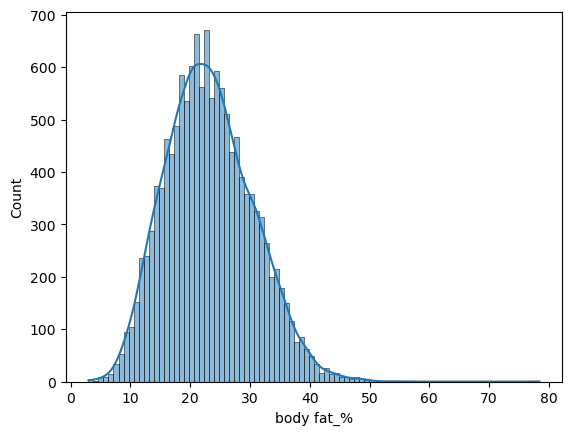

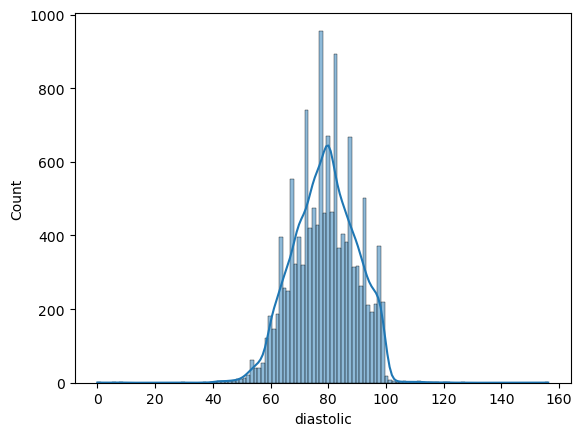

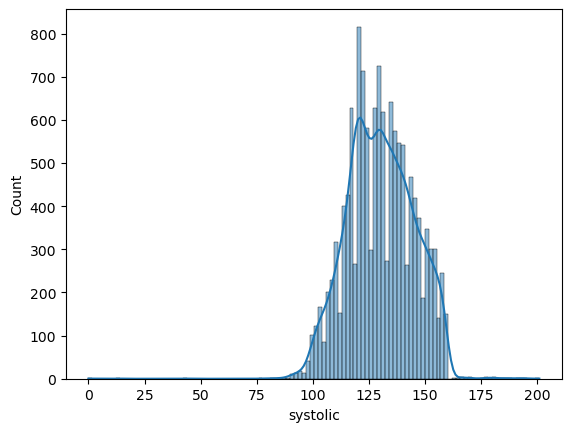

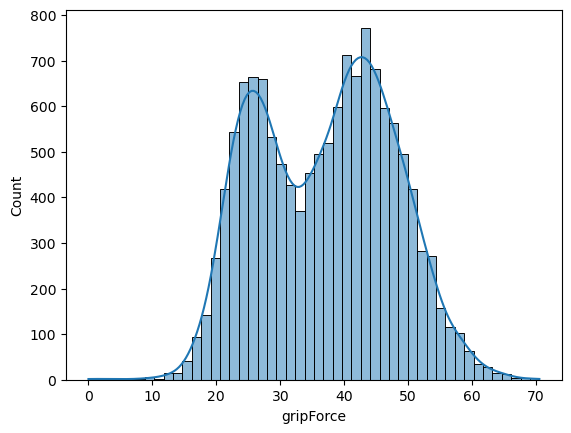

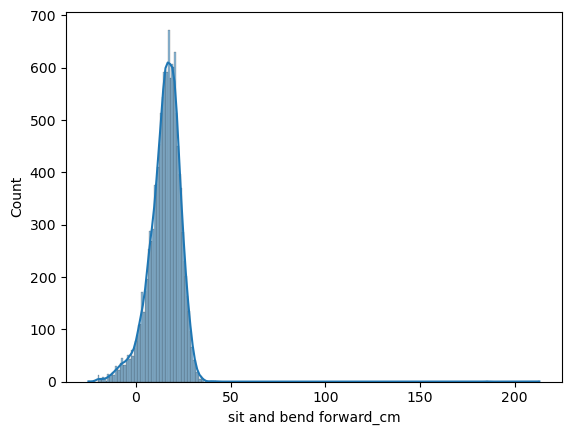

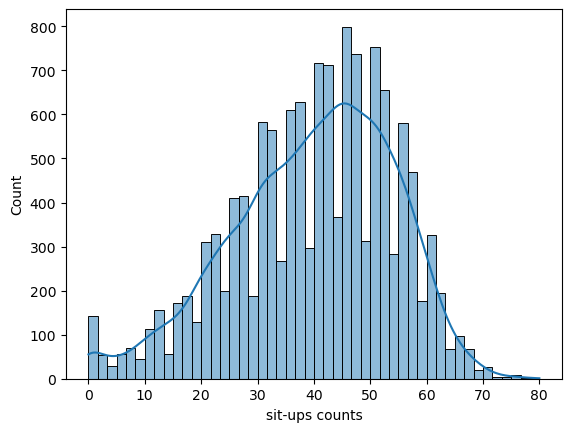

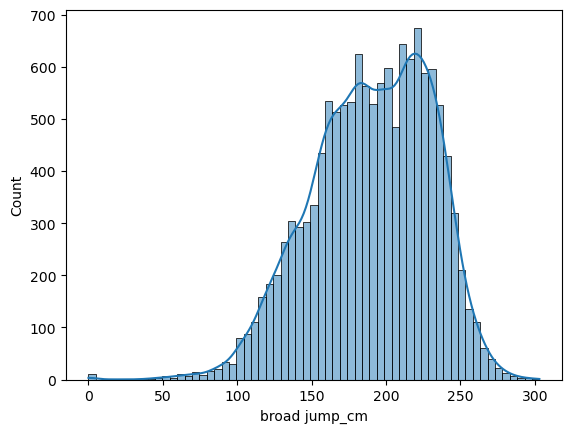

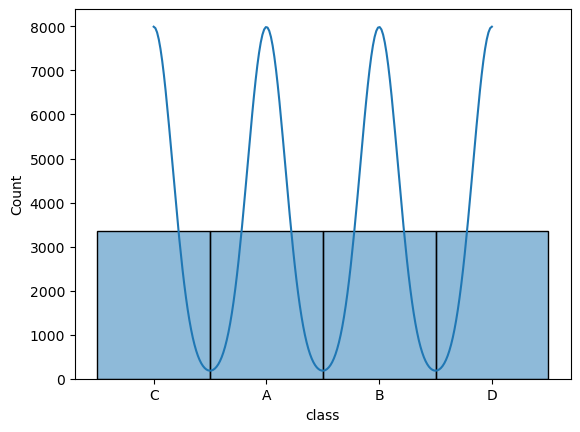

In [11]:
for i in data.columns:
    sns.histplot(x=data[i],kde = True)
    plt.show()

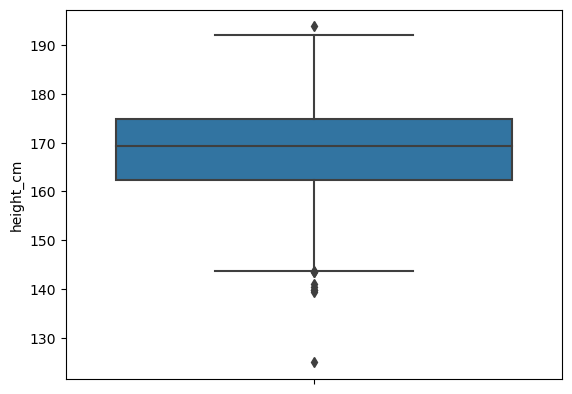

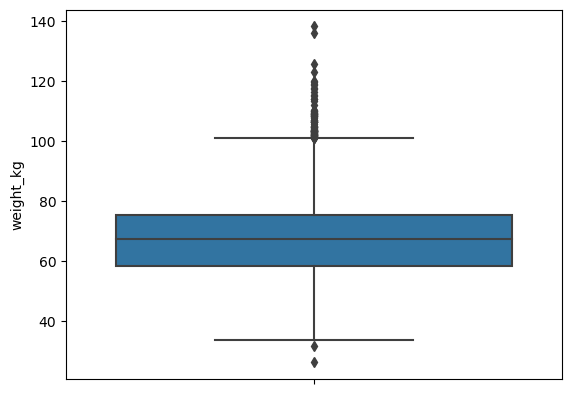

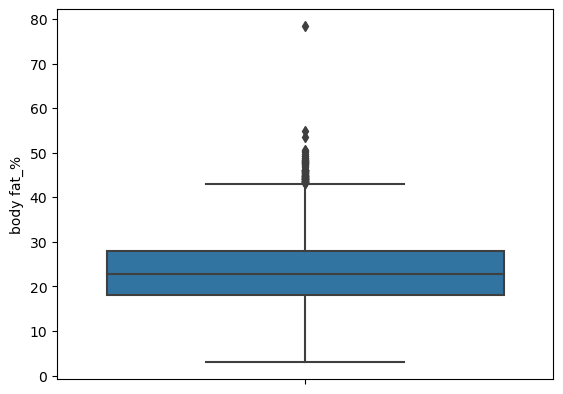

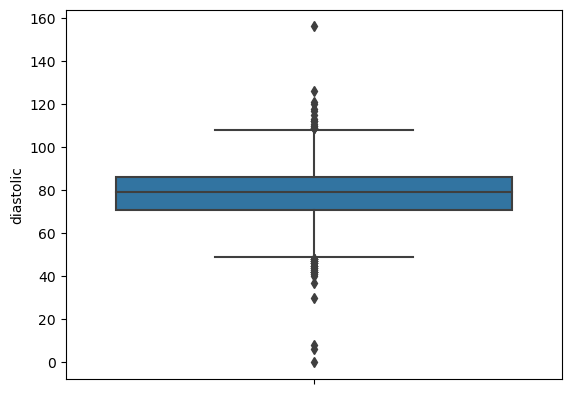

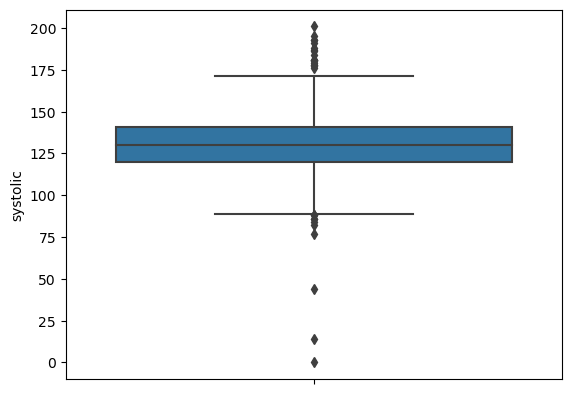

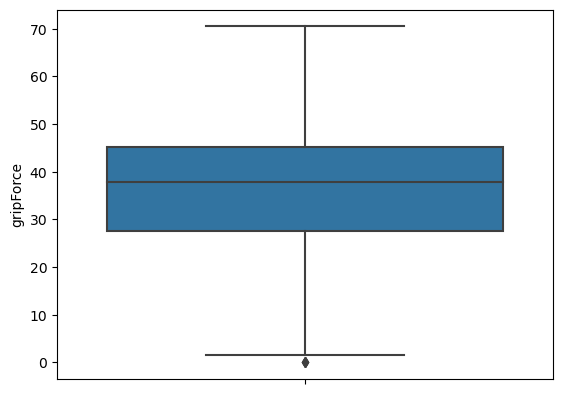

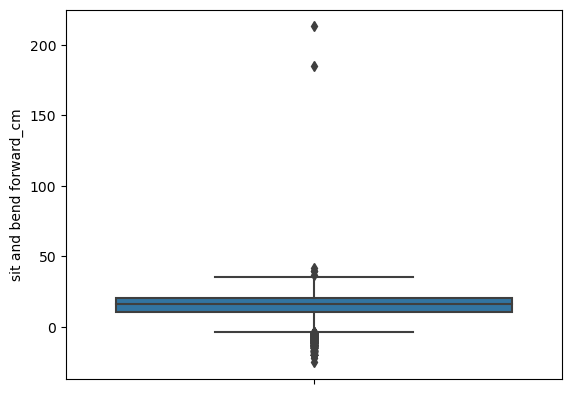

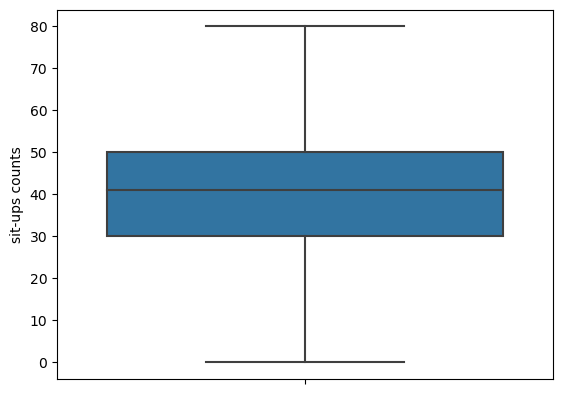

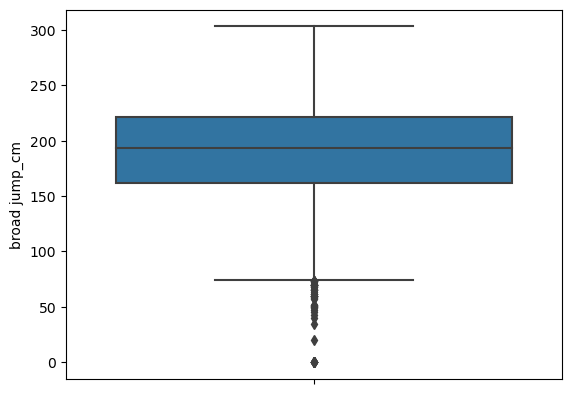

In [12]:
for i in Data.columns:
    sns.boxplot(y=data[i])
    plt.show()

#### Removing outliers

In [13]:
def outlier_limit(col):
    Q1,Q3 = np.nanpercentile(col,[25,75])
    IQR = Q3-Q1
    UL = Q3 +1.5*IQR
    LL = Q1 -1.5*IQR
    return LL,UL

In [14]:
LL,UL = outlier_limit(Data['height_cm'])
Data['height_cm'] = np.where((Data['height_cm']>UL)|(Data['height_cm']<LL),np.nan,Data['height_cm'])

In [15]:
LL,UL = outlier_limit(Data['weight_kg'])
Data['weight_kg'] = np.where((Data['weight_kg']>UL)|(Data['weight_kg']<LL),np.nan,Data['weight_kg'])

In [16]:
LL,UL = outlier_limit(Data['body fat_%'])
Data['body fat_%'] = np.where((Data['body fat_%']>UL)|(Data['body fat_%']<LL),np.nan,Data['body fat_%'])

In [17]:
LL,UL = outlier_limit(Data['diastolic'])
Data['diastolic'] = np.where((Data['diastolic']>UL)|(Data['diastolic']<LL),np.nan,Data['diastolic'])

In [18]:
LL,UL = outlier_limit(Data['systolic'])
Data['systolic'] = np.where((Data['systolic']>UL)|(Data['systolic']<LL),np.nan,Data['systolic'])

In [19]:
LL,UL = outlier_limit(Data['gripForce'])
Data['gripForce'] = np.where((Data['gripForce']>UL)|(Data['gripForce']<LL),np.nan,Data['gripForce'])

In [20]:
LL,UL = outlier_limit(Data['sit and bend forward_cm'])
Data['sit and bend forward_cm'] = np.where((Data['sit and bend forward_cm']>UL)|(Data['sit and bend forward_cm']<LL),np.nan,Data['sit and bend forward_cm'])

In [21]:
LL,UL = outlier_limit(Data['sit-ups counts'])
Data['sit-ups counts'] = np.where((Data['sit-ups counts']>UL)|(Data['sit-ups counts']<LL),np.nan,Data['sit-ups counts'])

In [22]:
LL,UL = outlier_limit(Data['broad jump_cm'])
Data['broad jump_cm'] = np.where((Data['broad jump_cm']>UL)|(Data['broad jump_cm']<LL),np.nan,Data['broad jump_cm'])

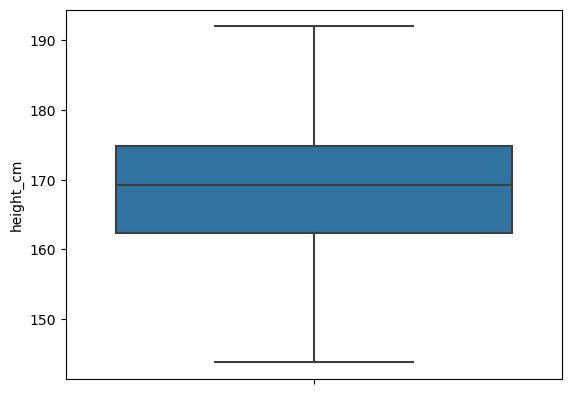

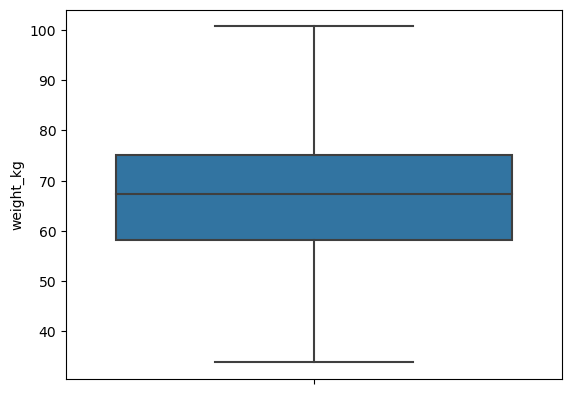

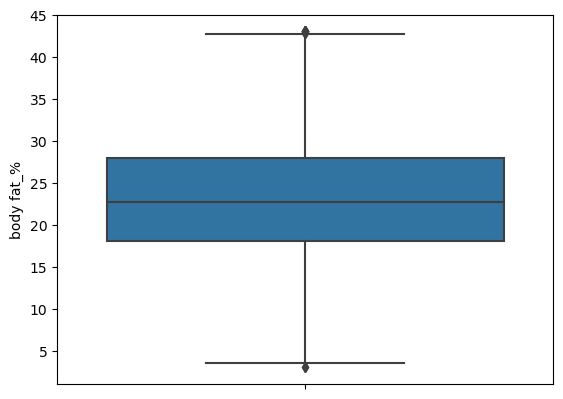

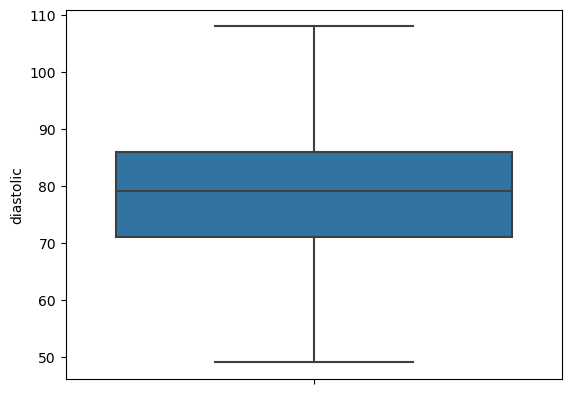

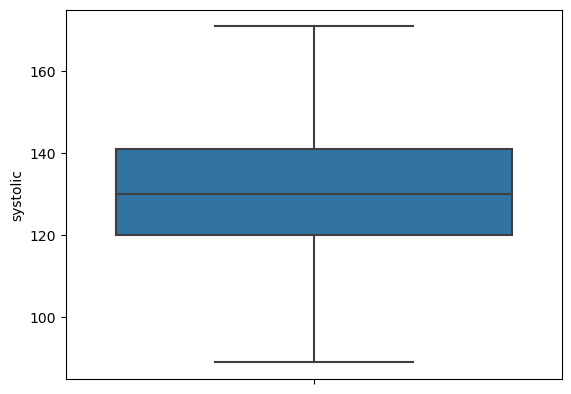

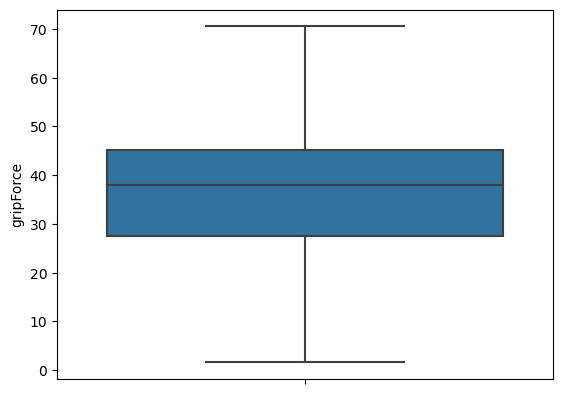

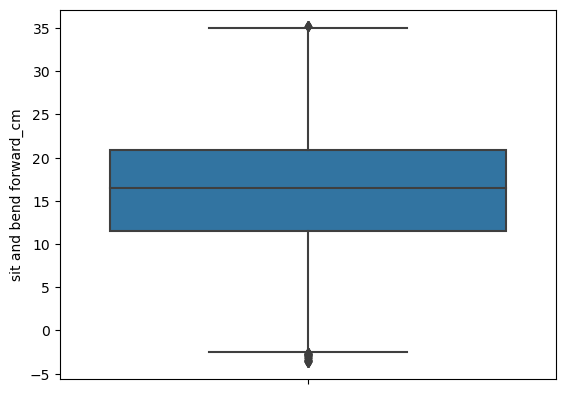

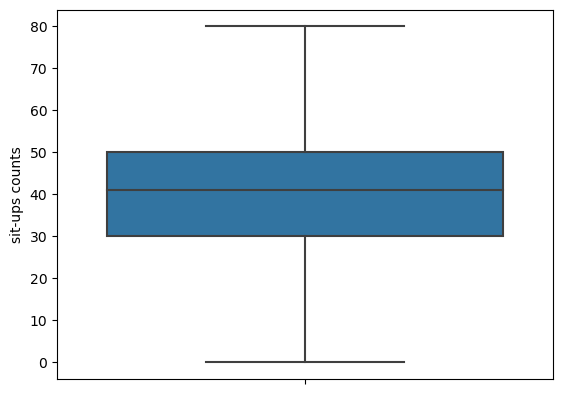

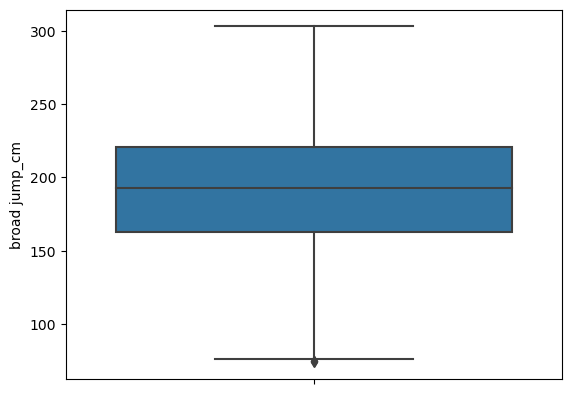

In [23]:
for i in Data.columns:
    sns.boxplot(y=Data[i])
    plt.show()

In [24]:
Data.dropna(inplace=True)

#### Multivariate Analysis

#### Scatterplot

In [25]:
Data.columns

Index(['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

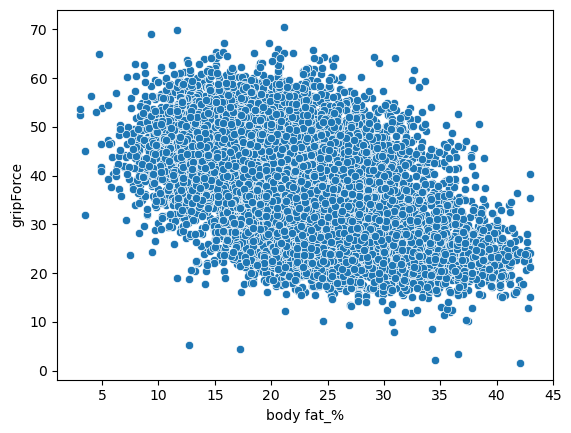

In [26]:
sns.scatterplot(data=Data,x = 'body fat_%',y='gripForce')
plt.show()

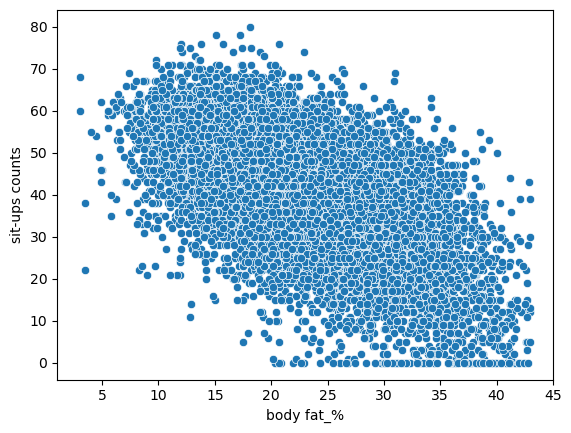

In [27]:
sns.scatterplot(data=Data,x = 'body fat_%',y='sit-ups counts')
plt.show()

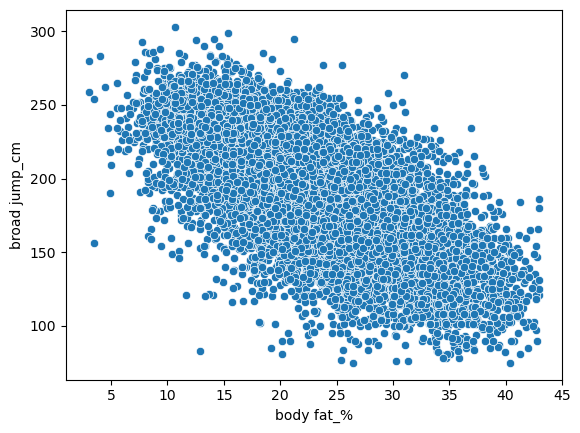

In [28]:
sns.scatterplot(data=Data,x = 'body fat_%',y='broad jump_cm')
plt.show()

#### Heatmap

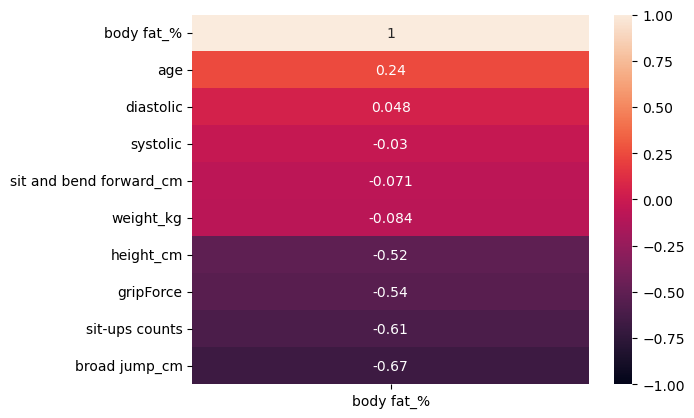

In [29]:
sns.heatmap(data.corr()[['body fat_%']].sort_values(by = 'body fat_%',ascending=False),vmin=-1,vmax=1,annot=True)
plt.show()

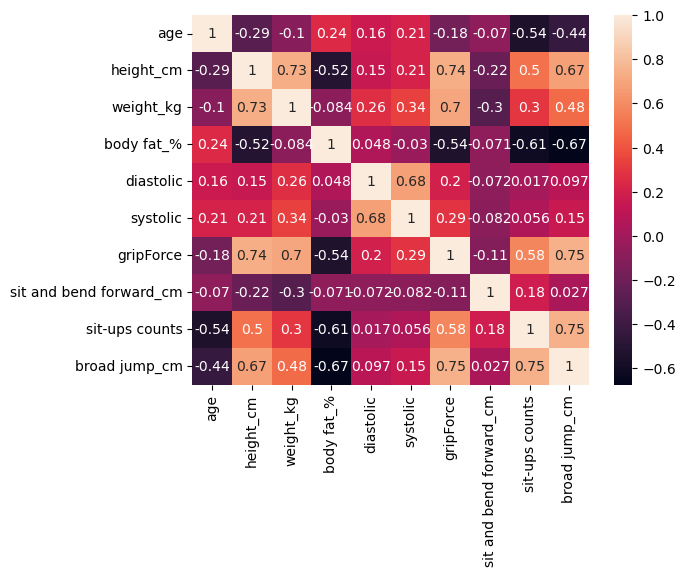

In [30]:
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Selecting features and targets

In [31]:
x = Data.iloc[:,:-1].values
y = Data.iloc[:,-1].values

#### Feature Scaling

#### Splitting the data into training and testing tests

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=54,shuffle=True)

#### Initialising Standard Scaler

In [33]:
sc = StandardScaler()

In [34]:
x_train = sc.fit_transform(x_train)

In [35]:
x_test = sc.transform(x_test)

#### Model Building

In [36]:
models = {
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'LinearSVR':LinearSVR(),
    'DecisionTreeREgressor':DecisionTreeRegressor(),
    'GradientBoostRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(random_state=0),
}

#### Using a for loop for model training and testing

In [37]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train,y_train)*100
    testing_score = model.score(x_test,y_test)*100
    score =r2_score(y_test,model.predict(x_test))*100
    mae = mean_absolute_error(y_test,model.predict(x_test))
    mse = mean_squared_error(y_test,model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse_test: ",rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  75.53365144892693
training_score:  75.97384312631895
testing_score:  75.53365144892693
mae:  14.936884127642726
mse:  365.6046142796452
rmse_test:  19.12079010605067
****************************************************************************************************
model trained with Ridge
r2score:  75.53354565876069
training_score:  75.97384296259084
testing_score:  75.53354565876069
mae:  14.936923962584704
mse:  365.6061951192561
rmse_test:  19.120831444245727
****************************************************************************************************
model trained with Lasso
r2score:  75.34188739646035
training_score:  75.7683380517
testing_score:  75.34188739646035
mae:  14.988183462470543
mse:  368.4701756153872
rmse_test:  19.19557698052828
****************************************************************************************************
model trained with LinearSVR
r2score:  75.56822949338995
training_score:  75.965813212

#### Using GradientBoostRegressor

#### Initialising the model

In [39]:
model = GradientBoostingRegressor()

#### Fitting the model with training data

In [40]:
model.fit(x_train,y_train)

GradientBoostingRegressor()

#### Predicting using the test data

In [41]:
y_pred = model.predict(x_test)

#### Evaluating the accuracy

In [42]:
r2_score(y_test,y_pred)

0.7608762782950815

#### Testing accuracy

In [43]:
model.score(x_test,y_test)

0.7608762782950815

#### Training accuracy

In [45]:
model.score(x_train,y_train)

0.7865372236448198

#### MAE

In [46]:
mean_absolute_error(y_test,y_pred)

14.783074187543432

#### MSE

In [47]:
mean_squared_error(y_test,y_pred)

357.3264553823482

#### Root Mean Squared Error

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

18.903080579163497

#### Creating a dataframe with y_test and y_pred

In [49]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Prediction'])

In [50]:
Output.head()

,Actual,Prediction
0,238.0,219.957035
1,214.0,195.321466
2,214.0,202.725250
3,249.0,247.054956
4,130.0,140.336587


#### Plotting the result

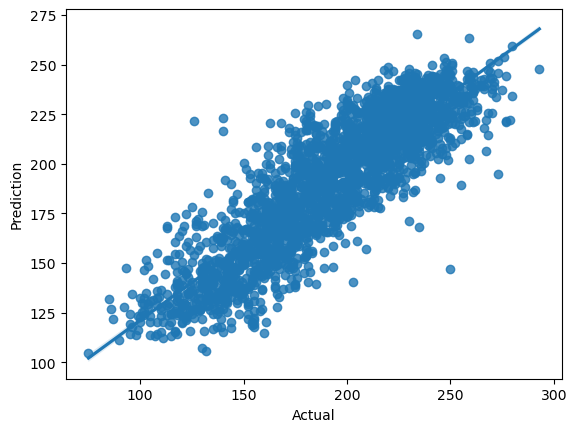

In [51]:
sns.regplot(data=Output,x='Actual',y='Prediction')
plt.show()